In [112]:
import numpy as np
import matplotlib.pyplot as plt
from random import random

In [113]:
def I_j_plus_one(d, I_j, c, m):
    return (d*I_j+c)%m

def norm(I, m):
    return I/(m-1)

def b(a):
    return a**2/2

def calc(m, a, c, steps, initial=40):
    I = norm(initial, m)
    rand_num = [I]
    for i in range(steps):
        I = I_j_plus_one(a, I, c, m)
        rand_num.append(norm(I, m))
    return rand_num

def calc_pair(steps, interval_1, interval_2):
    ran_1 = calc(6075, 106, 1283, steps, initial=40)
    ran_2 = calc(6897, 160, 1364, steps, initial=20)
    return [x*interval_1 for x in ran_1], [x*interval_2 for x in ran_2]
        
def rejection(steps, interval_1, interval_2, b, a):
    x, y = calc_pair(steps, interval_1, interval_2)
    res = []
    for i in range(len(x)):
        if b(a)*x[i] > y[i]:
            res.append(x[i])
    return res

(array([ 111.,  336.,  632.,  827., 1086., 1210., 1480., 1637., 1759.,
        1896., 2109., 2404., 2574., 2846., 2984., 3230., 3452., 3566.,
        3650., 3872., 4173., 4364., 4640., 4742., 5028., 5178., 5330.,
        5486., 5602., 5950., 6177., 6349., 6576., 6796., 6958., 7119.,
        7236., 7391., 7707., 7952., 8121., 8364., 8586., 8725., 8939.,
        9052., 9139., 9471., 9696., 9923.]),
 array([0.00329272, 0.01322687, 0.02316101, 0.03309516, 0.04302931,
        0.05296345, 0.0628976 , 0.07283174, 0.08276589, 0.09270003,
        0.10263418, 0.11256832, 0.12250247, 0.13243662, 0.14237076,
        0.15230491, 0.16223905, 0.1721732 , 0.18210734, 0.19204149,
        0.20197563, 0.21190978, 0.22184392, 0.23177807, 0.24171222,
        0.25164636, 0.26158051, 0.27151465, 0.2814488 , 0.29138294,
        0.30131709, 0.31125123, 0.32118538, 0.33111953, 0.34105367,
        0.35098782, 0.36092196, 0.37085611, 0.38079025, 0.3907244 ,
        0.40065854, 0.41059269, 0.42052684, 0.43046098, 

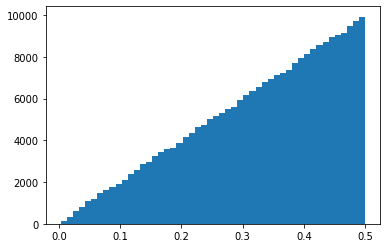

In [114]:
a = 0.5

x = rejection(1000000, a, b(a), b, a)
    
plt.hist(x, bins=50)

In [115]:
def circ_prob(x):
    return np.sqrt(1-x**2)

In [116]:
circ = rejection(10000, 1, 1, circ_prob, 1)

In [117]:
def rejection_circ(steps, interval_1, interval_2, f):
    x, y = calc_pair(steps, interval_1, interval_2)
    res_x = []
    res_y = []
    for i in range(len(x)):
        if f(x[i]) >= y[i]:
            res_x.append(x[i])
            res_y.append(y[i])
    return res_x, res_y

In [118]:
x, y = rejection_circ(100, 1, 1, circ_prob)

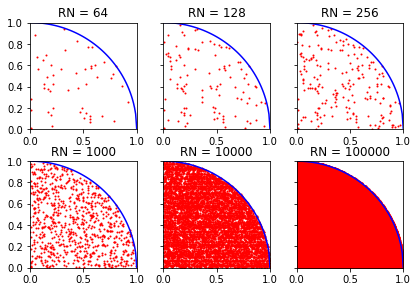

In [144]:
x_circ = np.linspace(0, 1, 100)

fig, axs = plt.subplots(2, 3, sharey=True)
fig.tight_layout()
for i in range(6):
    if i <= 2:
        n = 2**(i+1*6)
        x, y = rejection_circ(n, 1, 1, circ_prob)
        ax = axs[0][i]
        ax.scatter(x, y, c="r", s=1)
        ax.plot(x_circ, circ_prob(x_circ), c="blue", label=f"RN = {n}")
        ax.set_aspect("equal", "box")
        ax.set_ylim(0, 1)
        ax.set_xlim(0, 1)
        ax.title.set_text(f'RN = {n}')
    else:
        n = 10**(i)
        x, y = rejection_circ(n, 1, 1, circ_prob)
        ax = axs[1][i-3]
        ax.scatter(x, y, s=1, c="r", label=f"RN = {n}")
        ax.plot(x_circ, circ_prob(x_circ), c="blue")
        ax.set_aspect("equal", "box")
        ax.set_ylim(0, 1)
        ax.set_xlim(0, 1)
        ax.title.set_text(f'RN = {n}')
        
        


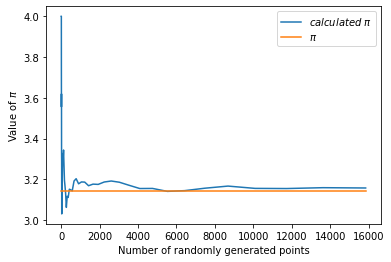

In [150]:
x_plot = np.logspace(1, 4.2, dtype=int)


res = []
for i in x_plot:
    x, y = rejection_circ(i, 1, 1, circ_prob)
    res.append(len(x)/i*4)

    
plt.plot(x_plot, res, label="$calculated \; \pi$")
plt.plot(x_plot, [np.pi for x in x_plot], label="$\pi$")
plt.xlabel("Number of randomly generated points")
plt.ylabel("Value of $\pi$")
plt.legend()